In [33]:
import pandas as pd
import requests
import io

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-shampoo-sales.csv')
df.shape

(36, 2)

In [35]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [36]:
import matplotlib.pyplot as plt

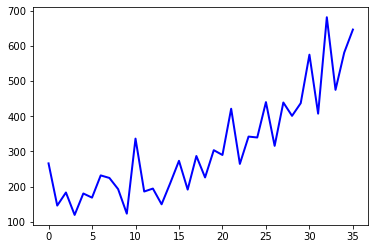

In [37]:
plt.plot(df['Sales'],c= 'b', linewidth = 2,linestyle = '-')

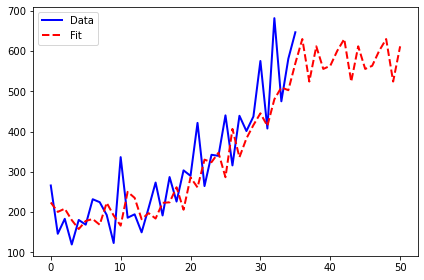

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing
model = ExponentialSmoothing(df["Sales"][0:40],seasonal='mul',seasonal_periods=6).fit()
pred = model.predict(start=0,end=50)
plt.plot(df["Sales"],c='b',linewidth=2,linestyle='-',label='Data')
plt.plot(pred,c='r',linewidth=2,linestyle='--',label='Fit')
plt.legend()
plt.tight_layout()
plt.show()

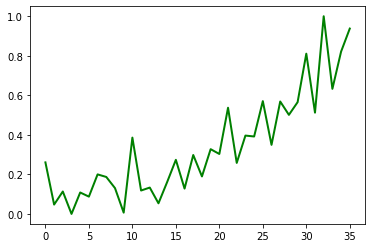

In [39]:
from sklearn.preprocessing import MinMaxScaler
#d = df['Sales'].reshape(-1,1)
d = df['Sales'].values
d = d.reshape(-1,1)
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(d)
plt.plot(ts_scaled,c="g",linewidth=2, linestyle='-')
plt.show()

In [40]:
ts_scaled_2 = ts_scaled.reshape(1,-1,1)

In [41]:
n_epochs = 1001
batch_size = 1
learning_rate = 0.0002

In [42]:
n_input = 1
n_neurons = 100
n_output = 1

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [44]:
from keras.models import Sequential
from keras.layers import Activation, SimpleRNN,Dense
from keras.layers import TimeDistributed
my_model = Sequential()
my_model.add(SimpleRNN(units=n_neurons,return_sequences=True,input_shape=(None,n_input)))
my_model.add(TimeDistributed(Dense(units=n_output,activation='linear')))

In [45]:
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, None, 100)         10200     
                                                                 
 time_distributed_1 (TimeDis  (None, None, 1)          101       
 tributed)                                                       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [46]:
from keras.optimizers import Adam
my_optimizer = Adam(learning_rate=learning_rate)
my_model.compile(loss='mse',optimizer=my_optimizer,metrics=['mse'])

In [47]:
my_summary = my_model.fit(ts_scaled_2[:,:-1,:],ts_scaled_2[:,1:,:],epochs=n_epochs,batch_size=batch_size,verbose=0)
my_summary.history.keys()

dict_keys(['loss', 'mse'])

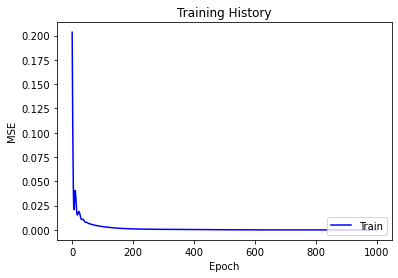

In [48]:
plt.plot(my_summary.history['mse'],c='b')
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='lower right')
plt.show()

In [49]:
n_ts_seed = 5
n_predict_time_steps = 55

In [50]:
import numpy as np
ts_seed = ts_scaled[0:n_ts_seed]
for i in range(n_predict_time_steps):
    X = ts_seed.reshape(1,-1,1)
    y_pred = my_model.predict(X)
    y_last = y_pred[0,-1,0]
    ts_seed = np.concatenate((ts_seed,np.array([y_last]).reshape(1,1)),axis=0)
    

1/1 [==============================] - 0s 24ms/step


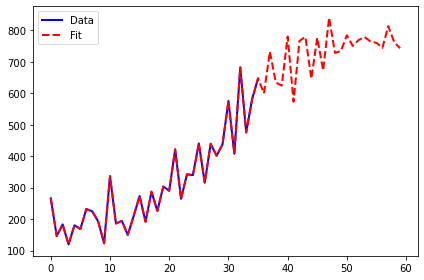

In [54]:
ts = scaler.inverse_transform(ts_seed)
plt.plot(d,c='b',linewidth=2,linestyle='-',label='Data')
plt.plot(ts,c='r',linewidth=2,linestyle='--',label='Fit')
plt.legend()
plt.tight_layout()
#plt.savfig('out.png')
plt.show()